# Section 2: The iris dataset - your first neural network

The iris dataset contains fifty measurements of three different species of iris flowers. 

The iris setosa: ![setosa](https://www.plant-world-seeds.com/images/seed_images/IRIS_SETOSA_ARCTICA/size3_500x500/F%20IRIS%20SETOSA%20ARCTICA.JPG)
The iris versicolor: ![versicolor](https://upload.wikimedia.org/wikipedia/commons/3/30/Iris_versicolor_2.jpg)
The iris verginica: ![verginica](https://upload.wikimedia.org/wikipedia/commons/2/27/Southern_Blue_Flag_Iris_%28iris_virginica%29_-_Flickr_-_Andrea_Westmoreland.jpg)

A scientist many years ago tried if he could find a difference between these species based on the petal width and height, and the sepal width and height: 
![petal sepal](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

The iris dataset is an excellent dataset to explain details of neural networks. We start every section by loading the data and visualising several features. 

## Downloading and importing the dataset
The iris dataset is so interesting that it is included in the sklearn python package that was installed in your Docker container. Let's start by loading the data, and several important libraries we are going to use today:




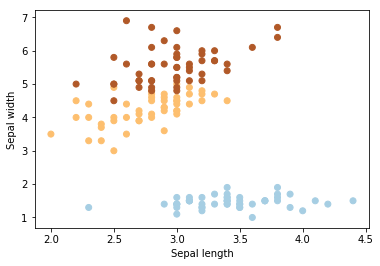

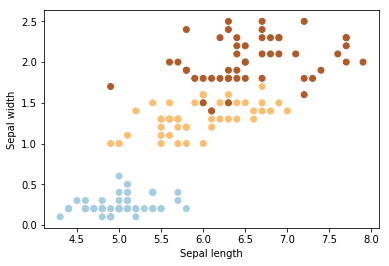

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
#print(iris)

#print(iris.data[0:10,:])
#print(Y)



plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')



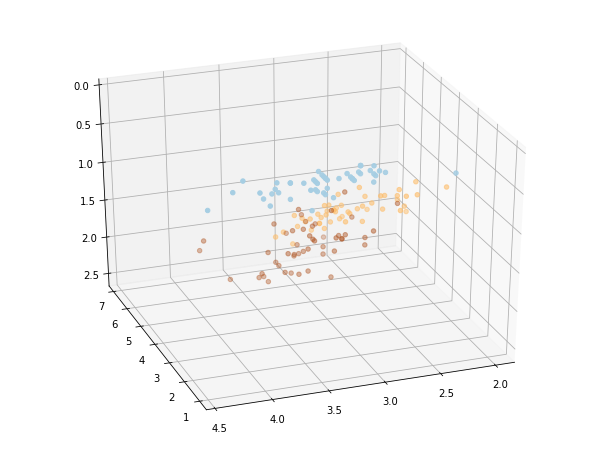

In [3]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris.data[:, 1], iris.data[:, 2],iris.data[:, 3], c=iris.target,
           cmap=plt.cm.Paired)

## The human brain
Here are some images of neurons in the human brain: 
![neuron 1](https://upload.wikimedia.org/wikipedia/commons/f/fb/Gyrus_Dentatus_40x.jpg)
![neuron 2](https://www.macalester.edu/academics/psychology/whathap/UBNRP/Website_REM_Sleep/bioNeuron.png)
![neuron 3](https://www.researchgate.net/profile/Domen_Verber/publication/224829971/figure/fig2/AS:302710445363204@1449183202992/Fig-2-A-time-diagram-of-neuron-activation-Except-for-a-few-exceptions-the-cells-are.png)

This inspired people long ago to define mathematical models: 
The artificial neuron looks like this: 
![the artificial neuron](https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png)

Putting multiple artificial neurons together: 
![neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1000px-Colored_neural_network.svg.png)

See some stuff here: 
http://www.pinchofintelligence.com/wp-content/uploads/2017/01/Neural-Machine-Translation-For-language-professionals.pdf





Teach forward-propagation, gradients, show learning-rate stuff...

About forward propagation: 

Imagine we only get the value of sepal width. The higher this value, the more unlikely it is that it's a class 3 flower. In terms of neurons we could have this: 


Now we don't only have one input, but multiple inputs. If we only have a "single layer" network, we have a connection from each of the inputs to each of the outputs. 

In terms of computation we can say that we have the following activation for the third class: 

$input1 * w11 + input2 * w12 + input3 * w13$

We can define this as a matrix multiplication. If you are new to this, take a look at this Youtube video: https://www.youtube.com/watch?v=kqWCwwyeE6k

### Bias 
Our dataset contains 50 samples for each flower. In practice it's likely that one of the flowers occurs more often than the others. To help your network train with that we can add a "bias" to our neurons. This would look like this: 
XXXX

### Activation function
As we saw in our brain activation function a cell becomes VERY active after it reached a certain treshold of incoming activation. We want the same to happen in our artificial neural network: an outputcell should have a high activity if it knows it's activated. 

To do this we apply an "activation function" to our output neurons. To speed up the course from the math to practice I will quickly show you the sigmoid activation function in an image: 
![sigmoid activation function](https://qph.ec.quoracdn.net/main-qimg-2f0e7ccc8fd54e238ae46a3d5fcc6908?convert_to_webp=true)
We apply this function to the result of our matrix multiplication. If this result is high, our activation will be one. If this result is 0, our activation will be 0.5. If this result is very negative, our activation will be 0. In later videos we will talk about activation functions, and how to use them, but for now: just keep in mind that we do this. 


## Your first neural network

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/learn/iris.py


In [18]:
tf.reset_default_graph()

n_input = 4
n_output = 3

input_shape = [None,n_input]
inputplaceholder = tf.placeholder(dtype=tf.float32, shape=input_shape, name="input_placeholder") # https://www.tensorflow.org/api_docs/python/tf/placeholder
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))
                      
layer_1 = tf.matmul(inputplaceholder, weights)
layer_2 = tf.add(layer_1, biases)
layer_3 = tf.nn.sigmoid(layer_2)


## Training your network
Well, looks like we have a neural network that doesn't really do anything. That's because we did not talk about the weights yet. We only did **forward propagation**, but our network does not learn anything. 

We are going to train our neural network using **backpropagation**. Imagine that our network gives a totally wrong prediction for this flower: 
-- input --
-- output --

In our case, we surely say that this output is wrong. We would have liked class X and X to be zero, and class X to be one. We can define a certain **cost** for the error our network makes, by applying a [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)


In this case we want the activation of class X to be higher, and of class X and X to be lower. The logical thing to do is to change the weights that contributed to the wrong output. As we don't know what the ideal weights are we are only going to change them a little bit, and hope that this helps. 

Let's determine what weights to lower based on the **gradient**, and lower them proportionally to the **cost**. To define how hard we change them we define a **learning rate**. If our learning rate is low we only change our weighs a little bit, if our learning rate is high we change them very fast!

This method is called **gradient descent**. You look where the wrong output is coming from (the gradient), and lower the weights that contributed to this. Tensorflow has a function for this! We only need to define our cost function (which is based on the output we expected), the cost (how wrong the network is), and how we **optimize** our neural network. 




In [31]:
learning_rate = 0.1

labelsplaceholder = tf.placeholder(dtype=tf.float32, shape=[None,n_output], name="labels_placeholder")
cost = tf.losses.mean_squared_error(labelsplaceholder, layer_3) # https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error

print(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

Tensor("mean_squared_error_3/value:0", shape=(), dtype=float32)


## Training

We defined everything, and our Tensorflow graph should now look like this: 



Next we start training by feeding it several samples and labels. 


In [32]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)


In [37]:
import random
mydata = list(zip(iris.data, iris.target))

# for x in mydata:
#     print(x)
batch_size = 10

for _ in range(400):
    input_output_pairs = random.sample(mydata, batch_size)
    inputdata = [x[0] for x in input_output_pairs]
    outputdata = [x[1] for x in input_output_pairs]
    outputlogits = [[0.0]*n_output]*batch_size
    for index,label in enumerate(outputdata): 
        outputlogits[index][label-1]=1.0
    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={inputplaceholder: inputdata, labelsplaceholder: outputlogits})
    print(res_cost)

0.333539
0.333503
0.3336
0.652246
0.333534
0.333594
0.333592
0.333598
0.333529
0.333505
0.333731
0.333617
0.333517
0.33357
0.333614
0.333504
0.333422
0.333563
0.33362
0.333584
0.333454
0.333594
0.333535
0.333605
0.333471
0.333484
0.333547
0.333454
0.333576
0.333598
0.333507
0.333469
0.333628
0.333564
0.333551
0.333494
0.333423
0.333502
0.333581
0.333516
0.333544
0.333554
0.333565
0.333542
0.333598
0.333451
0.333501
0.333491
0.333425
0.333477
0.333517
0.333605
0.333411
0.333517
0.333501
0.333501
0.33349
0.333477
0.33355
0.33353
0.333499
0.333577
0.333436
0.33345
0.333538
0.656622
0.333477
0.653625
0.333559
0.333688
0.333493
0.333591
0.33363
0.333502
0.333433
0.33362
0.333535
0.333492
0.333612
0.333559
0.333546
0.333548
0.333546
0.657276
0.333639
0.33348
0.333585
0.333566
0.333583
0.333467
0.33349
0.333549
0.000163334
0.333567
0.333591
0.333526
0.33344
0.33351
0.333508
0.333547
0.333597
0.333497
0.333489
0.333478
0.333526
0.33346
0.333458
0.65026
0.33353
0.333536
0.333549
0.333467
0.3335

0.333439
0.657935
0.333407
0.333467
0.333484
0.333445
0.333411
0.333405
0.333387
0.333421
0.333375
0.333465
0.657338
0.000148642
0.333392
0.333429
0.333403
0.333421
0.333367
0.333432
0.333407
0.333471
0.333405
0.333348
0.333477
0.333398
0.657364
0.333432
0.333367
0.333362
0.33343
0.000188107
0.333342
0.33338
0.333452
0.333401
0.333457
0.333374
0.000155848
0.33342
0.333445
0.655193
0.333414
0.333364
0.333433
0.333434
0.333384
0.333388
0.333385
0.333467
0.333422
0.333396
0.333427
0.333427
0.333409
0.333399
0.33349
0.333379
0.333388
0.333407
0.333346
0.333357
0.333399
0.333435
0.333391
0.655276
0.333434
0.333371
0.333472
0.333353
0.33344
0.333451
0.333326
0.333454
0.333477
0.333367
0.333422
0.33351
0.333403
0.333438
0.333383
0.333489
0.333436
0.333404
0.333393
0.658483
0.333451
0.333381
0.333442
0.333407
0.333441
0.333322
0.656821
0.333437
0.333327
0.000224555
0.333392
0.33355
0.333453
0.333454
0.333496
0.333495
0.33343
0.333368
0.33342
0.333382
0.333492
0.333474
0.333443
0.33344
0.333409

0.333399
0.333424
0.333316
0.333351
0.333396
0.333355
0.333355
0.333298
0.333361
0.333345
0.333288
0.333377
0.333461
0.657492
0.333337
0.333437
0.333312
0.333478
0.333418
0.333378
0.33354
0.333432
0.33341
0.333346
0.333494
0.333369
0.333435
0.333373
0.333342
0.333368
0.333363
0.333455
0.333448
0.333306
0.333424
0.33329
0.333382
0.333264
0.333447
0.333335
0.653016
0.333407
0.3334
0.333421
0.333354
0.333397
0.333429
0.333382
0.333334
0.333367
0.333447
0.333383
0.333284
0.333346
0.33333
0.000120526
0.333365
0.333378
0.333527
0.333473
0.333419
0.333322
0.333376
0.000199954
0.333432
0.333462
0.333402
0.333389
0.333487
0.33348
0.333467
0.333363
0.333353
0.333408
0.333395
0.333443
0.333277
0.333375
0.333336
0.333402
0.333469
0.333274
0.333345
0.333402
0.333361
0.333328
0.33332
0.333311
0.333459
0.333405
0.33331
0.333334
0.333392
0.333436
0.333289
0.333304
0.333439
0.333344
0.333351
0.333368
0.333325
0.333269
0.333415
0.333374
0.333346
0.333367
0.333421
0.333302
0.333379
0.33335
0.333309
0.333

0.333239
0.333355
0.333322
0.333298
0.333385
0.332993
0.33322
0.333264
0.333358
0.333229
0.33328
0.333236
0.333333
0.333306
0.333173
0.333178
0.333332
0.333268
0.333312
0.333323
0.333228
0.333367
0.333253
0.33326
0.333278
0.333359
0.333125
0.333175
0.333269
0.333372
0.65579
0.333371
0.333168
0.33336
0.333457
0.333304
0.33327
0.333203
0.333173
0.333359
0.333233
0.333212
0.333292
0.333463
0.333339
0.33326
0.333133
0.333145
0.333273
0.333355
0.333191
0.333222
0.333312
0.333305
0.333129
0.333288
0.333345
0.332998
0.660045
0.333357
0.333352
0.333253
0.333359
0.333404
0.333361
0.333245
0.333194
0.333348
0.333401
0.333258
0.333326
0.333234
0.333346
0.333434
0.333334
0.333257
0.333185
0.333245
0.333055
0.00013405
0.333197
0.333269
0.333196
0.333296
0.333228
0.333225
0.333264
0.333077
0.333306
0.333254
0.333225
0.333374
0.333124
0.33329
0.33329
0.333305
0.333169
0.333201
0.333286
0.333227
0.333345
0.333334
0.333171
0.333268
0.333202
0.657715
0.3333
0.333339
0.333336
0.333288
0.333158
0.333335
0

0.655979
0.332722
0.332499
0.332714
0.655215
0.333024
0.333291
0.332817
0.332959
0.333176
0.33298
0.333156
0.332956
0.333246
0.000148589
0.332812
0.333028
0.33317
0.332817
0.333249
0.332905
0.332508
0.333259
0.332808
0.333089
0.333234
0.332673
0.332917
0.000127659
0.333359
0.333068


In [ ]:
from sklearn import model_selection

import tensorflow as tf


X_FEATURE = 'x'  # Name of the input feature.


def main(unused_argv):
  # Load dataset.
  iris = datasets.load_iris()
  x_train, x_test, y_train, y_test = model_selection.train_test_split(
      iris.data, iris.target, test_size=0.2, random_state=42)
